# <center>Tarea 6</center>
---
<center>Matemáticas para las ciencias de la computación</center>

---

<center>Por: Miguel Angel Soto Hernandez</center>

## Fundamentos de los modelos de aprendizaje automático

Los modelos de aprendizaje automático son herramientas matemáticas que permiten descubrir representaciones sintéticas de eventos externos, con el fin de obtener una mejor comprensión y predecir el comportamiento futuro. A veces estos modelos sólo se han definidos desde un punto de vista teórico, pero los avances en la investigación nos permiten ahora aplicar conceptos de aprendizaje automático para comprender mejor el comportamiento de sistemas sistemas complejos, como las redes neuronales profundas. En este capítulo, vamos a introducir y discutir algunos elementos fundamentales. Es posible que los lectores expertos ya conozcan estos elementos, pero aquí ofrecemos varias interpretaciones y aplicaciones posibles.

### Modelos y datos
Los modelos de aprendizaje automático trabajan con datos. Crean asociaciones, descubren relaciones, descubren patrones, generan nuevas muestras y mucho más, trabajando con conjuntos de datos bien definidos, que son colecciones homogéneas de puntos de datos (por ejemplo observaciones, imágenes o medidas) relacionados con un escenario específico (por ejemplo, la temperatura de una habitación muestreada cada 5 minutos, o los pesos de una población de individuos)

Desgraciadamente, a veces las suposiciones o condiciones impuestas a los modelos de aprendizaje automático no están claras, y un largo proceso de entrenamiento puede dar lugar a un fracaso total de la validación. Podemos pensar en un modelo como una caja gris (cierta transparencia está garantizada por la simplicidad de muchos algoritmos comunes), donde una entrada vectorial X extraída de un conjunto de datos se transforma en una salida vectorial Y


#### Estructura y propiedades de los conjuntos de datos

¿Cuál es la naturaleza de X e Y? Un problema de aprendizaje automático se centra en el aprendizaje de relaciones abstractas que permiten una generalización consistente cuando se proporcionan nuevas muestras. Más concretamente, podemos definir un proceso estocástico de generación de datos con una distribución de probabilidad conjunta asociada:

$$p_{data}(x,y)=p(x|y)p(x)$$

El proceso $p_{data}$ representa la expresión más amplia y abstracta del problema. Por ejemplo, un clasificador que debe distinguir entre retratos masculinos y femeninos se basará en un proceso de generación de datos que define teóricamente las probabilidades de todos los rostros posibles, con respecto al atributo binario masculino/femenino. Está claro que nunca podemos trabajar directamente con $p_{data}$ sólo es posible encontrar una fórmula bien definida que describa $p_{data}$ en algunos casos limitados (por ejemplo, la distribución de todas las imágenes pertenecientes a un conjunto de datos). 

### Características de un modelo de aprendizaje automático


#### Capacidad de aprendizaje

Para simplificar, supongamos que tenemos un algoritmo selector que puede buscar una hipótesis $h_i$ en un conjunto $H$. Este elemento puede interpretarse de muchas maneras según el contexto. Por ejemplo, el conjunto de hipótesis podría corresponder al conjunto de parámetros razonables de un modelo o, en otro escenario, a un conjunto finito de algoritmos ajustados para resolver problemas específicos. Como la definición es general, no tenemos que preocuparnos por su estructura.

En el otro lado de este paisaje, está el conjunto de conceptos C que queremos aprender. Un concepto $𝑐_𝑖$ ∈ 𝐶 es una instancia de un problema que pertenece a una clase definida. De nuevo, la estructura puede variar, pero para simplificar el lector puede asumir que un concepto está asociado a un conjunto de entrenamiento clásico que contiene un número finito de puntos de datos.


#### Capacidad de un modelo

Si consideramos un modelo supervisado como un conjunto de funciones parametrizadas, podemos definir la capacidad de representación como la capacidad intrínseca de una determinada función genérica para mapear un número relativamente grande de distribuciones de datos. Para entender este concepto, consideremos una función $f(x)$ que admite infinitas derivadas, y reescribámosla como una expansión de Taylor alrededor de un punto de partida $x_0$:

$$f(x) = f(x_0)+\frac{f'(x_0)}{1!}(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+... = \sum^{\infty}_{n=0} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

Podemos decidir tomar sólo los primeros $n$ términos, para tener una función polinómica de n grados alrededor del punto de partida $x_0 = 0$:

$$f(x)\approx \theta_0 + \theta_1x + ... + \theta_nx^n$$

#### Sesgo de un estimador

Consideremos ahora un modelo parametrizado con un único parámetro vectorial. Esto no es una limitación, sólo una elección didáctica:

$$p(X;\overline\theta) \in C$$

El objetivo de un proceso de aprendizaje es estimar el parámetro 𝜃𝜃 para, por ejemplo, maximizar la precisión de sus clasificaciones. Definimos el sesgo de un estimador en relación con un parámetro $\overline\theta$:

$$ Bias[\overline\theta] = E_{x|\overline\theta}[\overline\theta] - \overline\theta \Rightarrow (\sum^{}_{\overline x} \overline\theta p (\overline\theta)) - \overline\theta$$

#### Varianza de un estimador

Al principio hemos definido el proceso de generación de datos pdata, y hemos supuesto que nuestro conjunto de datos X se ha extraído de esta distribución. Sin embargo, no queremos aprender las relaciones existentes limitadas a X; esperamos que nuestro modelo sea capaz de generalizar correctamente a cualquier otro subconjunto extraído de $p_{data}$. Una buena medida de esta capacidad la proporciona la varianza del estimador:

$$Var[\theta]=Stderr[\overline \theta]^2 = E[(\overline \theta - E[\overline \theta])^2]$$

### Ejemplo: Normalización

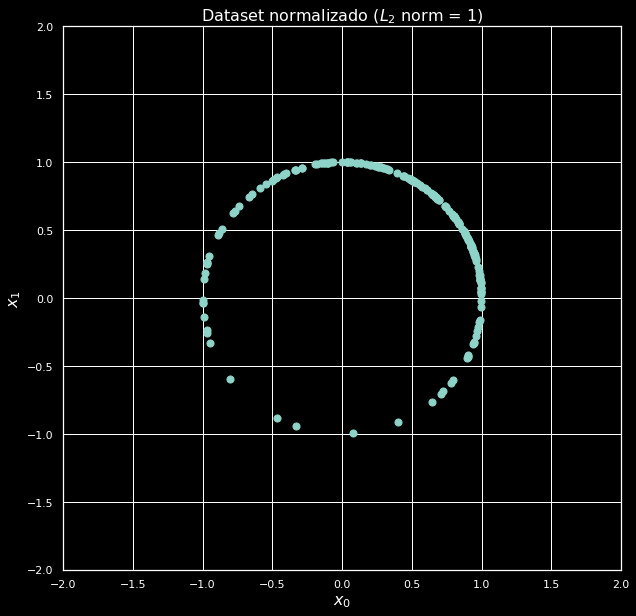

Grado en radianes: 1.2490457723982544


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import Normalizer
plt.style.use('dark_background')

# Definimos una semilla random para poderlo reproducir despues
np.random.seed(1000)


numero_muestras = 200
mu = [1.0, 1.0]
matriz_covarianza = [[2.0, 0.0], [0.0, 0.8]]


if __name__ == "__main__":
  # Creamos el conjunto de datos
  X = np.random.multivariate_normal(mean=mu, cov=matriz_covarianza, 
                                    size=numero_muestras)

  # Realizar la normalizacion
  normalizador = Normalizer(norm='l2')
  X_nz = normalizador.fit_transform(X)

  # Mostrar los resultados
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.scatter(X_nz[:, 0], X_nz[:, 1], s=50)
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_xlabel(r'$x_0$', fontsize=16)
  ax.set_ylabel(r'$x_1$', fontsize=16)
  ax.set_title(r'Dataset normalizado ($L_2$ norm = 1)', fontsize=16)
  plt.show()

  # Computar un ejemplo de prueba
  X_test = [
      [-4., 0.],
      [-1., 3.]
  ]

  Y_test = normalizador.transform(X_test)

  # Imprimir el grado (en radianes)
  print(f'Grado en radianes: {np.arccos(np.dot(Y_test[0], Y_test[1]))}')

Tal y como esperábamos, todos los puntos se sitúan ahora en un círculo unitario. Llegados a este punto, el lector podría preguntarse en qué puede ser útil este paso de preprocesamiento. En algunos contextos, como el Procesamiento del Lenguaje Natural (PLN), dos vectores de características son diferentes en proporción al ángulo que forman, mientras que son casi insensibles a la distancia euclidiana.


## Funciones de pérdida y Regularización

Las funciones de pérdida son aproximaciones que nos permiten medir el error cometido por un modelo de aprendizaje automático. Definen la propia estructura del problema a resolver, y preparan el algoritmo para un paso de optimización destinado a maximizar o minimizar la función de pérdida función de pérdida. A través de este proceso, nos aseguramos de que todos nuestros parámetros se eligen para con el fin de reducir el error tanto como sea posible. En este capítulo, vamos a discutir las funciones de pérdida fundamentales y sus propiedades. También he incluido una sección dedicada sección dedicada al concepto de regularización; los modelos regularizados son más resistentes a la sobreadaptación, y pueden lograr resultados más allá de los límites de una función de pérdida simple.

### Definición de las funciones de pérdida y coste 

Muchos problemas de aprendizaje automático pueden expresarse a través de una función proxy que mide el error de entrenamiento. La suposición implícita obvia es que, al reducir tanto los errores de entrenamiento como los de validación, la precisión aumenta y el algoritmo alcanza su objetivo.

Si consideramos un escenario supervisado (muchas consideraciones valen también para los semisupervisados), con conjuntos de datos finitos X e Y:

$$X = \{ \overline x_0, \overline x_1, ..., \overline x_N \} where \overline x_i \in \mathbb{R}^k$$

$$Y = \{ \overline y_0, \overline y_1, ..., \overline y_N \} where \overline y_i \in \mathbb{R}^t$$

Podemos definir la función de pérdida genérica para un solo punto de datos como:

$$J(\overline x_i, \overline y_i, \overline \theta) = J(f(\overline x_i, \overline \theta), \overline y_i) = J(\overline y_i, \overline y_i)$$

#### Regularización

Cuando un modelo está mal condicionado o es propenso al sobreajuste, la regularización ofrece algunas herramientas válidas para mitigar los problemas. Desde un punto de vista matemático, un regularizador es una penalización que se añade a la función de costes para imponer una condición adicional a la evolución de los parámetros:

$$L_R(X, Y, \overline \theta) = L(X, Y, \overline \theta) + \lambda(\overline \theta)$$

El parámetro 𝜆 controla la fuerza de la regularización, que se expresa a través de la función 𝑔(𝜃). Una condición fundamental en 𝑔(𝜃) es que debe ser diferenciable para que la nueva función de coste compuesta pueda seguir siendo optimizada mediante algoritmos SGD. En general, se puede emplear cualquier función regular; sin embargo, normalmente necesitamos una función que pueda contrastar el crecimiento indefinido de los parámetros.

### Ejemplo: Regularización

Si el conjunto de datos X contiene 1000 puntos $\overline x_i$ ∈ $ℝ^p$ precisión óptima se alcanza con este tamaño de muestra cuando todas las características son informativas cuando k < p características son irrelevantes, necesitamos aproximadamente 1000 + O(log k) muestras. Esto es una simplificación del resultado original; por ejemplo, si p = 5000 y 500 características son irrelevantes, asumiendo el caso más simple, necesitamos aproximadamente 1000 + log 500 ≈ 1007 puntos de datos.

Este resultado es muy importante porque a menudo es difícil y costoso obtener un gran número de muestras nuevas, en particular cuando se obtienen en contextos experimentales (por ejemplo, ciencias sociales, investigación farmacológica, etc.). Antes de continuar, consideremos un conjunto de datos sintético que contiene 500 puntos $\overline x_i$ ∈ $ℝ^10$ con sólo ̅cinco características informativas:

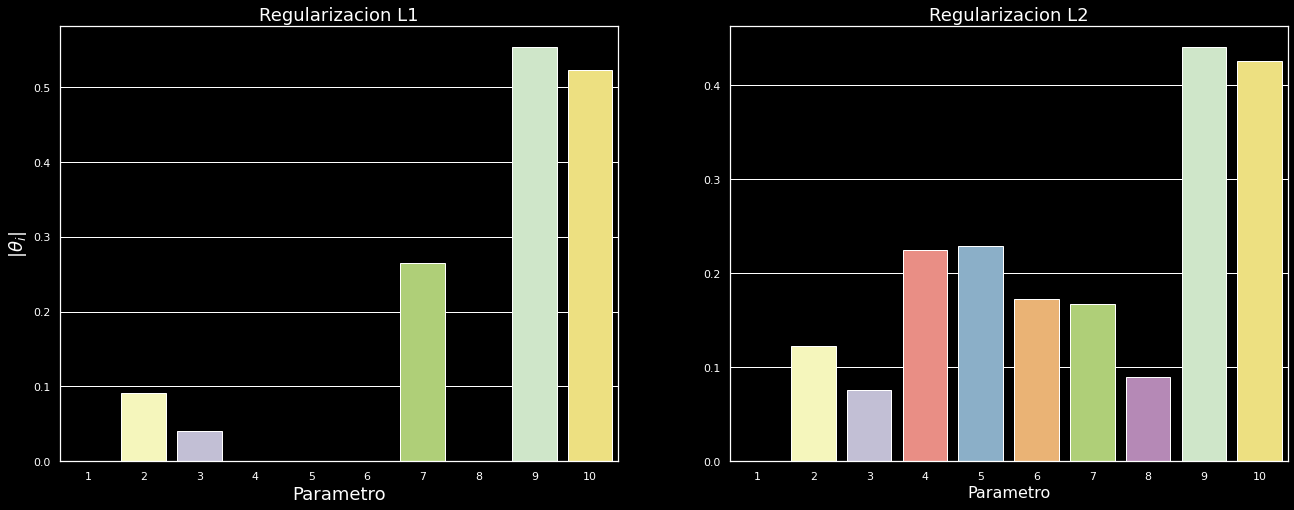

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
plt.style.use('dark_background')


# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)


if __name__ == '__main__':
  # Crear el conjunto de datos
  X, Y = make_classification(n_samples=500, n_classes=2, n_features=10, 
                             n_informative=5, n_redundant=3, 
                             n_clusters_per_class=2, random_state=1000)

  # Escalar el conjunto de datos
  ss = StandardScaler()
  X_s = ss.fit_transform(X)


  '''
  Ahora podemos ajustar dos instancias de regresión logística con todo el 
  conjunto de datos: la primera utilizando la regularización L2 y la segunda 
  utilizando L1. En ambos casos, la fuerza se mantiene fija:
  '''
  # Entrenar dos regresiones logísticas con penalizaciones L2 y L1
  lr_l2 = LogisticRegression(solver='saga', penalty='l2', C=0.25, 
                             random_state=1000)
  lr_l2.fit(X_s, Y)

  lr_l1 = LogisticRegression(solver='saga', penalty='l1', C=0.25, 
                             random_state=1000)
  lr_l1.fit(X_s, Y)

  # Trazar los coeficientes
  df = pd.DataFrame(np.array([np.abs(lr_l1.coef_[0]), 
                              np.abs(lr_l2.coef_[0])]).T, 
                    columns=['L1', 'L2'])
  

  fig, ax = plt.subplots(1, 2, figsize=(22, 8))

  sns.barplot(x=df.index + 1, y='L1', data=df, ax=ax[0])
  sns.barplot(x=df.index + 1, y='L2', data=df, ax=ax[1])

  ax[0].set_title('Regularizacion L1', fontsize=18)
  ax[0].set_xlabel('Parametro', fontsize=18)
  ax[0].set_ylabel(r'$|\theta_i|$', fontsize=18)

  ax[1].set_title('Regularizacion L2', fontsize=18)
  ax[1].set_xlabel('Parametro', fontsize=16)
  ax[1].set_ylabel('')

  plt.show()

## Introducción al aprendizaje semi-supervisado

El aprendizaje semisupervisado es una rama del aprendizaje automático que trata de resolver problemas que incluyen tanto datos etiquetados como no etiquetados, empleando conceptos que incluyen características de los métodos de agrupación y clasificación.

La gran disponibilidad de muestras sin etiquetar, y la dificultad de etiquetar correctamente enormes conjuntos de datos, llevó a muchos investigadores a investigar los mejores enfoques que permiten extender el conocimiento proporcionado por las muestras etiquetadas a una población mayor sin etiquetar, sin pérdida de precisión.



### Escenario semisupervisado

El contexto del aprendizaje semisupervisado se define entonces por la unión de los dos conjuntos $\{XL , YL\}$ y $X_U$. Una suposición importante sobre las muestras no etiquetadas es que que se supone que sus etiquetas faltan al azar, sin ninguna correlación con la distribución real de las etiquetas. Se supone que el conjunto de datos no etiquetados tiene una distribución que no difiere drásticamente de la etiquetada en términos de equilibrio de clases (por ejemplo, no podemos esperar que el 90% de las muestras no etiquetadas pertenezcan a la misma clase y las restantes se repartan entre todas las clases restantes).

En un marco general, no hay restricciones sobre los valores de N y M; sin embargo un problema semisupervisado surge normalmente cuando el número de puntos no etiquetados es (mucho) mayor que la cardinalidad del conjunto etiquetado. Si podemos extraer N >> M puntos etiquetados de $p_{data}$, probablemente sea inútil seguir trabajando con enfoques semisupervisados, y es probable que los métodos supervisados clásicos sean la mejor opción. La complejidad extra que necesitamos se justifica por M >> N, que es una condición común en todas aquellas situaciones en las que la cantidad de datos sin etiquetar disponibles es grande y el número de muestras correctamente etiquetadas es bastante menor.

### Mezcla gaussiana generativa

El primer modelo que vamos a discutir se llama Generative Gaussian Mixture, y pretende modelar el proceso de generación de datos $p_{data}$ utilizando una suma de distribuciones gaussianas ponderadas ponderadas. Como el modelo es generativo, su estructura nos permite no sólo agrupar el conjunto de datos existente en regiones bien definidas (representadas como gaussianas), sino también emitir la probabilidad de que cualquier punto de datos nuevo pertenezca a cada una de las clases. Este modelo es muy flexible, y puede aplicarse para resolver todos aquellos problemas en los que es necesario realizar una agrupación y una clasificación al mismo tiempo, obteniendo el vector de probabilidad de asignación que determina la probabilidad de que un punto de datos sea generado por una distribución gaussiana específica.

### Autoformación

El autoentrenamiento es un enfoque muy intuitivo de la clasificación semisupervisada, que se basa en una amplia aplicación de los supuestos de suavidad y agrupación. El autoentrenamiento suele ser una opción válida cuando el conjunto de datos etiquetados contiene suficiente información sobre el proceso subyacente de generación de datos (es decir, un CV muestra una precisión relativamente alta) y se supone que la muestra no etiquetada sólo es responsable de un ajuste fino del algoritmo. Si no se cumple esta condición, no se puede optar por el autoentrenamiento, ya que depende en gran medida de la integridad de la muestra etiquetada.

### Co-Training

El coentrenamiento es otro enfoque semisupervisado muy sencillo pero eficaz, propuesto por Blum y Mitchell (en Blum A., Mitchell T., Combining Labeled and Unlabeled Data with Co-Training, 11th Annual Conference on Computational Learning 1998) como estrategia alternativa cuando el conjunto de datos es multidimensional multidimensional, y diferentes grupos de características codifican aspectos diferentes pero de cada clase. El coentrenamiento sólo es eficaz en los casos en que los puntos de datos pueden teóricamente con sólo una parte de las características (incluso con una ligera pérdida de rendimiento). pérdida de rendimiento). Como vamos a ver, la redundancia resulta útil en de una muestra no etiquetada, para compensar la falta de conocimiento que un clasificador puede tener. Por el contrario, si cada punto de datos contiene características que no pueden dividirse en dos grupos separados y autónomos, este método es ineficaz.

### Ejemplo: 

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Definir una semilla random para poderlo reproducir despues
np.random.seed(1000)


if __name__ == "__main__":
  # Cargar dataset
  vino = load_wine()
  X, Y = shuffle(vino['data'], vino['target'], random_state=1000)

  num_muestras = X.shape[0]
  num_etiquetados = 20
  num_sin_etiquetar = num_muestras - num_etiquetados
  num_muestras_sin_etiquetar = 2
  feature_cut = 7

  X_unlabeled = X[-num_sin_etiquetar:]
  X_labeled = X[:num_etiquetados]
  Y_labeled = Y[:num_etiquetados]
  X_labeled_1 = X_labeled[:, 0:feature_cut]
  X_labeled_2 = X_labeled[:, feature_cut:]

  # Entrenar un clasificador Naive-Bayes de prueba
  nb0 = GaussianNB()
  nb0.fit(X_labeled, Y_labeled)

  # Informe de clasificación de NB único
  print(classification_report(Y, nb0.predict(X), 
                              target_names=vino['target_names']))

  # Realizar el procedimiento de Cotraining
  nb1 = None
  nb2 = None

  while X_labeled_1.shape[0] <= num_muestras:
    nb1 = GaussianNB()
    nb1.fit(X_labeled_1, Y_labeled)

    nb2 = GaussianNB()
    nb2.fit(X_labeled_2, Y_labeled)

    if X_labeled_1.shape[0] == num_muestras:
      break

    probs1 = nb1.predict_proba(X_unlabeled[:, 0:feature_cut])
    top_confidence_idxs1 = np.argsort(np.max(probs1, axis=1))[::-1]
    selected_idxs1 = top_confidence_idxs1[0:num_muestras_sin_etiquetar]

    probs2 = nb2.predict_proba(X_unlabeled[:, feature_cut:])
    top_confidence_idxs2 = np.argsort(np.max(probs2, axis=1))[::-1]
    selected_idxs2 = top_confidence_idxs2[0:num_muestras_sin_etiquetar]

    selected_idxs = list(selected_idxs1) + list(selected_idxs2)

    X_new_labeled = X_unlabeled[selected_idxs]
    X_new_labeled_1 = X_unlabeled[selected_idxs1, 0:feature_cut]
    X_new_labeled_2 = X_unlabeled[selected_idxs2, feature_cut:]

    Y_new_labeled_1 = nb1.predict(X_new_labeled_1)
    Y_new_labeled_2 = nb2.predict(X_new_labeled_2)

    X_labeled_1 = np.concatenate((X_labeled_1, X_new_labeled[:, 0:feature_cut]), 
                                 axis=0)
    X_labeled_2 = np.concatenate((X_labeled_2, X_new_labeled[:, feature_cut:]), 
                                 axis=0)
    Y_labeled = np.concatenate((Y_labeled, Y_new_labeled_1, Y_new_labeled_2), 
                               axis=0)

    X_unlabeled = np.delete(X_unlabeled, selected_idxs, axis=0)

  # Imprimir los informes de clasificación de Cotraining
  print(classification_report(Y, nb1.predict(X[:, 0:feature_cut]), 
                              target_names=vino['target_names']))
  print(classification_report(Y, nb2.predict(X[:, feature_cut:]), 
                              target_names=vino['target_names']))

              precision    recall  f1-score   support

     class_0       1.00      0.51      0.67        59
     class_1       0.68      1.00      0.81        71
     class_2       1.00      0.92      0.96        48

    accuracy                           0.81       178
   macro avg       0.89      0.81      0.81       178
weighted avg       0.87      0.81      0.81       178

              precision    recall  f1-score   support

     class_0       1.00      0.75      0.85        59
     class_1       0.77      0.97      0.86        71
     class_2       0.95      0.88      0.91        48

    accuracy                           0.87       178
   macro avg       0.91      0.86      0.87       178
weighted avg       0.89      0.87      0.87       178

              precision    recall  f1-score   support

     class_0       1.00      0.71      0.83        59
     class_1       0.78      0.97      0.87        71
     class_2       0.96      0.96      0.96        48

    accuracy        

## Clasificación avanzada semisupervisada



### Estimación pesimista de la probabilidad contrastiva 

La CPLE es capaz de superar los métodos de clasificación estándar con un coste computacional, que puede ser relativamente mayor debido a la reevaluación de la log-verosimilitud por la función de optimización. Sin embargo, la complejidad adicional es una condición normal en el aprendizaje semisupervisado y, en este punto, debería estar claro cuándo este coste es razonable y cuándo es preferible ceñirse a un conjunto de datos más pequeño y etiquetado, etiquetado. El lector puede probar otros ejemplos utilizando diferentes clasificadores, como SVM o Árboles de Decisión, y comprobar cuándo la CPLE permite obtener mayor precisión que otros algoritmos supervisados.

### Máquinas de vectores de apoyo semisupervisadas ($S^3VM$)

Cuando hablamos de la suposición de cluster, también definimos las regiones de baja densidad como límites y el problema correspondiente como separación de baja densidad. Un clasificador supervisado común basado en este concepto es una máquina de vectores de apoyo (SVM), cuyo objetivo es maximizar la distancia entre las regiones densas donde deben estar las muestras. 

$S^3VM$ es un enfoque muy potente que ofrece una gran flexibilidad para adaptarse a diferentes escenarios. Es especialmente adecuado cuando la estructura de la muestra no etiquetada es parcialmente (o incluso completamente) desconocida, y la responsabilidad principal del etiquetado debe concederse a las muestras etiquetadas.

### Máquinas de vectores de apoyo transductoras (TSVM)

Las TSVM son potentes modelos semisupervisados especialmente adecuados para  escenarios en los que la estructura geométrica del conjunto de datos es fiable y todos los puntos proceden del mismo proceso de generación de datos. Si se cumplen estas condiciones, el algoritmo puede aprovechar la estructura del conjunto de datos para encontrar el etiquetado más adecuado para la muestra no etiquetada. Por otro lado, si la muestra sin etiquetar es ruidosa, o su estructura puede derivar de múltiples procesos, el TSVM no es una opción adecuada y podría dar resultados muy inexactos.

### Ejemplo: TSVM

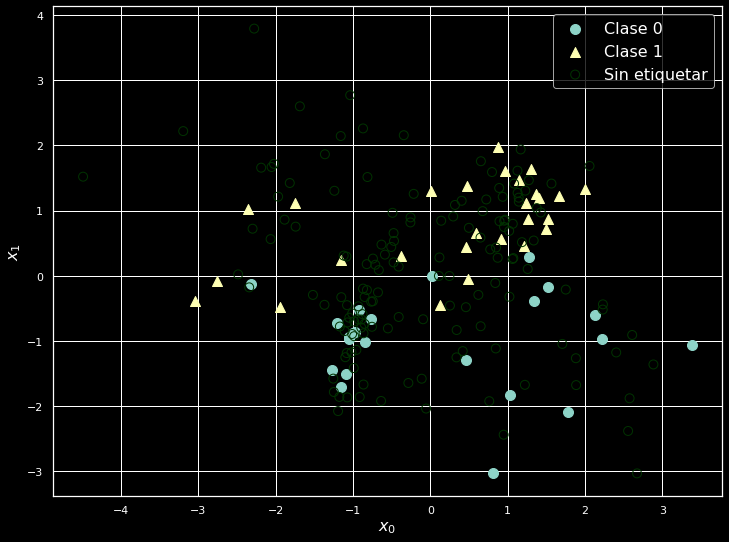

Optimizando...


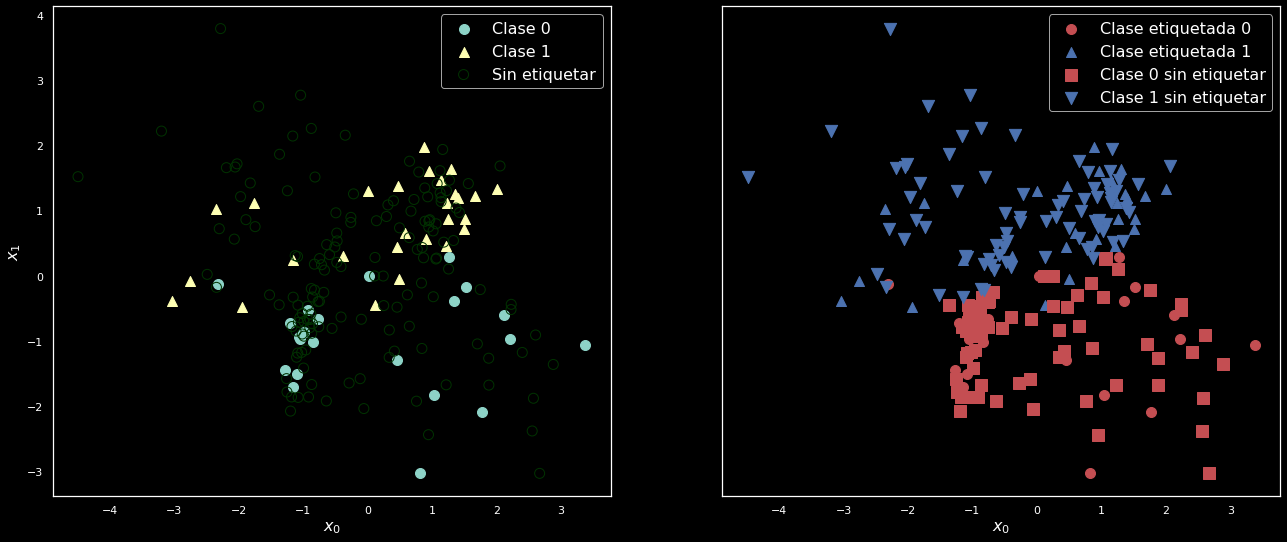

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from sklearn.datasets import make_classification
plt.style.use('dark_background')

'''
Vamos a utilizar un conjunto de datos bidimensional similar al empleado en el 
método anterior. Sin embargo, en este caso, impondremos 150 muestras sin 
etiquetar de un total de 200 puntos:
'''
# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)

nb_samples = 200
nb_unlabeled = 150


# Crear conjunto de datos
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, 
                           random_state=1000)
Y[Y==0] = -1
Y[nb_samples - nb_unlabeled:nb_samples] = 0

'''
El procedimiento es similar al que usamos antes. En primer lugar, tenemos que 
inicializar nuestras variables:
'''
# Inicializar variables TSVM
w = np.random.uniform(-0.1, 0.1, size=X.shape[1])
eta_labeled = np.random.uniform(0.0, 0.1, size=nb_samples - nb_unlabeled)
eta_unlabeled = np.random.uniform(0.0, 0.1, size=nb_unlabeled)
y_unlabeled = np.random.uniform(-1.0, 1.0, size=nb_unlabeled)
b = np.random.uniform(-0.1, 0.1, size=1)

C_labeled = 2.0
C_unlabeled = 0.1


# Apilar todas las variables en un solo vector
theta0 = np.hstack((w, eta_labeled, eta_unlabeled, y_unlabeled, b))

'''
En este caso, también tenemos que definir el vector y_unlabeled para las 
etiquetas variables. También sugiero utilizar dos constantes C 
(C_labeled y C_unlabeled), para poder ponderar la clasificación errónea de las 
muestras etiquetadas y no etiquetadas de forma diferente. Usamos un valor de 
2,0 para C_labeled y 0,1 para C_unlabeled, porque queremos aceptar la 
orientación de las muestras etiquetadas más que la estructura de las no 
etiquetadas. En otro ejemplo, compararemos los resultados con un escenario 
opuesto.
'''
def svm_target(theta, Xd, Yd):
  wt = theta[0:2].reshape((Xd.shape[1], 1))

  s_eta_labeled = np.sum(theta[2:2 + nb_samples - nb_unlabeled])
  s_eta_unlabeled = np.sum(theta[2 + nb_samples - nb_unlabeled:2 + \
                                 nb_samples])

  return (C_labeled * s_eta_labeled) + (C_unlabeled * s_eta_unlabeled) + \
          (0.5 * np.dot(wt.T, wt))


# Mientras que las restricciones etiquetadas y no etiquetadas son las siguientes
def labeled_constraint(theta, Xd, Yd, idx):
  wt = theta[0:2].reshape((Xd.shape[1], 1))

  c = Yd[idx] * (np.dot(Xd[idx], wt) + theta[-1]) + \
      theta[2:2 + nb_samples - nb_unlabeled][idx] - 1.0

  return int((c >= 0)[0])


def unlabeled_constraint(theta, Xd, idx):
  wt = theta[0:2].reshape((Xd.shape[1], 1))

  c = theta[2 + nb_samples:2 + nb_samples + nb_unlabeled][idx - nb_samples + \
            nb_unlabeled] * (np.dot(Xd[idx], wt) + theta[-1]) + \
            theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - \
            nb_samples + nb_unlabeled] - 1.0

  return int((c >= 0)[0])

'''
En este ejemplo, queremos emplear el algoritmo SLSQP para optimizar el objetivo.
Este método calcula el jacobiano (es decir, la matriz que contiene las primeras 
derivadas parciales) de todas las restricciones (incluidas las booleanas) y en 
NumPy 1.8+ el operador de diferencia (-) entre matrices booleanas ha quedado 
obsoleto y debe sustituirse por un XOR lógico. 

Desafortunadamente, esto puede causar incompatibilidades con SciPy; ya que ese 
es el caso, hemos transformado todas las salidas booleanas en valores enteros 
(0 y 1). Esta sustitución no afecta ni al rendimiento ni al resultado final. 
En este punto, podemos introducir las restricciones tanto para las muestras 
etiquetadas como para las no etiquetadas:
'''
def eta_labeled_constraint(theta, idx):
  return int(theta[2:2 + nb_samples - nb_unlabeled][idx] >= 0)


def eta_unlabeled_constraint(theta, idx):
  return int(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples]\
               [idx - nb_samples + nb_unlabeled] >= 0)

# Podemos crear el diccionario de restricciones que necesita SciPy:
if __name__ == '__main__':
  # Mostrar el conjunto de datos inicial
  # sns.set()

  fig, ax = plt.subplots(figsize=(12, 9))

  ax.scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Clase 0')
  ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Clase 1')
  ax.scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', 
             edgecolor='#003200', marker='o', s=80, label='Sin etiquetar')

  ax.set_xlabel(r'$x_0$', fontsize=16)
  ax.set_ylabel(r'$x_1$', fontsize=16)
  ax.grid(True)
  ax.legend(fontsize=16)

  plt.show()

  # Configurar todas las restricciones
  svm_constraints = []

  for i in range(nb_samples - nb_unlabeled):
      svm_constraints.append({
          'type': 'ineq',
          'fun': labeled_constraint,
          'args': (X, Y, i)
      })
      svm_constraints.append({
          'type': 'ineq',
          'fun': eta_labeled_constraint,
          'args': (i,)
      })

  for i in range(nb_samples - nb_unlabeled, nb_samples):
      svm_constraints.append({
          'type': 'ineq',
          'fun': unlabeled_constraint,
          'args': (X, i)
      })
      svm_constraints.append({
          'type': 'ineq',
          'fun': eta_unlabeled_constraint,
          'args': (i,)
      })


  '''
  Después de haber definido todas las restricciones, podemos minimizar la 
  función objetivo utilizando el método='SLSQP' y la opción del diccionario 
  'maxiter': 2000. En general, la convergencia se logra en un número menor de 
  iteraciones, pero aquí hemos hecho suposiciones como si estuviéramos 
  trabajando en un escenario más general:
  '''
  # Optimizar el objetivo
  print('Optimizando...')
  result = minimize(fun=svm_target, x0=theta0, constraints=svm_constraints,
                    args=(X, Y), method='SLSQP', tol=0.0001,
                    options={'maxiter': 2000})

  '''
  Una vez completado el proceso, podemos calcular las etiquetas de las muestras 
  no etiquetadas y comparar los gráficos:
  '''
  # Extraer los últimos parámetros
  theta_end = result['x']
  w = theta_end[0:2]
  b = theta_end[-1]

  Xu = X[nb_samples - nb_unlabeled:nb_samples]
  yu = -np.sign(np.dot(Xu, w) + b)

  # Mostrar las parcelas finales
  fig, ax = plt.subplots(1, 2, figsize=(22, 9), sharey=True)

  ax[0].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, 
                label='Clase 0')
  ax[0].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, 
                label='Clase 1')
  ax[0].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', 
                edgecolor='#003200', marker='o', s=100, label='Sin etiquetar')

  ax[0].set_xlabel(r'$x_0$', fontsize=16)
  ax[0].set_ylabel(r'$x_1$', fontsize=16)
  ax[0].grid(False)
  ax[0].legend(fontsize=16)

  ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], c='r', marker='o', 
                s=100, label='Clase etiquetada 0')
  ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], c='b', marker='^', s=100, 
                label='Clase etiquetada 1')

  ax[1].scatter(Xu[yu == -1, 0], Xu[yu == -1, 1], c='r', marker='s', s=150, 
                label='Clase 0 sin etiquetar')
  ax[1].scatter(Xu[yu == 1, 0], Xu[yu == 1, 1], c='b', marker='v', s=150, 
                label='Clase 1 sin etiquetar')

  ax[1].set_xlabel(r'$x_0$', fontsize=16)
  ax[1].grid(False)
  ax[1].legend(fontsize=16)

  plt.show()

## Aprendizaje semi-supervisado basado en gráficos

Los problemas que vamos a discutir pertenecen a dos categorías principales: la propagación de las etiquetas de clase a muestras no etiquetadas, y el uso de técnicas no lineales basadas en la suposición del múltiple para reducir la dimensionalidad del conjunto de datos original. En particular, este capítulo abarca los siguientes algoritmos de propagación:
- Propagación de etiquetas basada en la matriz de pesos
- Propagación de etiquetas en scikit-learn, basada en las probabilidades de transición
- Propagación de etiquetas
- Regularización laplaciana
- Propagación basada en paseos aleatorios de Markov 

### Propagación de etiquetas

La propagación de etiquetas es una familia de algoritmos semisupervisados que se basan en la representación gráfica de un conjunto de datos para explotar las relaciones existentes entre los nodos con el fin de propagar las etiquetas a los puntos no etiquetados. En concreto, si tenemos N puntos etiquetados (con etiquetas bipolares +1 y -1) y M puntos no etiquetados (denotados por y = 0), es posible construir un grafo no dirigido basado en una medida de afinidad geométrica entre las muestras.

### Dispersión de etiquetas

Otro algoritmo (propuesto por Zhou et al.) que debemos analizar es el denominado propagación de etiquetas, que ofrece una ligera mayor estabilidad cuando el conjunto de datos es muy ruidoso o denso. En estos casos, la propagación de etiquetas estándar podría sufrir una pérdida de precisión debido a la cercanía de los puntos con diferentes etiquetas. Por el contrario, la propagación de etiquetas es más robusta porque el laplaciano está normalizado y las transiciones bruscas se penalizan más (todos los detalles matemáticos son bastante complejos, pero el lector puede encontrar todos los detalles en Biyikoglu T., Leydold J., Stadler P. F., Laplacian Eigenvectors of Graphs, Springer, 2007).

El algoritmo se basa en el laplaciano normalizado del grafo, definido como

$$L=D \frac{1}{2} WD \frac{1}{2}$$

Considerándola en forma de matriz, tiene un elemento diagonal $ℒ_{ij}$ igual a 1, si el grado deg $ℒ_{ij}$ > 0 (0 en caso contrario), y todos los demás elementos iguales a:

$$ℒ_{ij} = - \frac {1}{\sqrt {deg v_i} \sqrt {deg v_j}} \text{ if } v_i \in neighbors(v_j)$$

Este operador es un caso particular de un laplaciano gráfico genérico:

$$L = D - W$$

### Propagación de etiquetas basada en Markov paseos aleatorios

El objetivo de este algoritmo propuesto por Zhu y Ghahramani es encontrar la distribución de probabilidad de las etiquetas objetivo para muestras no etiquetadas dado un conjunto de datos mixto. Este objetivo se consigue mediante la simulación de un proceso estocástico, en el que cada muestra no etiquetada recorre el gráfico hasta alcanzar un estado estacionario de absorción. Esta simulación se lleva a cabo mediante un proceso estocástico en el que cada muestra no etiquetada recorre el grafo hasta alcanzar un estado estacionario de absorción, una muestra etiquetada, en el que deja de adquirir la etiqueta correspondiente. La principal diferencia con otros enfoques similares es que en este caso se considera la probabilidad de alcanzar una muestra etiquetada. De este modo, el problema adquiere una forma forma cerrada y puede resolverse fácilmente.

### Aprendizaje múltiple

Ya hemos hablado de la suposición de los manifiestos, según la cual los datos de alta dimensión se encuentran normalmente en manifiestos de baja dimensión. Por supuesto, esto no es un teorema, pero en muchos casos reales, se ha demostrado que la suposición es correcta, y nos permite trabajar con algoritmos de reducción de la dimensionalidad no lineales que, de otro modo, serían inaceptables. En esta sección, vamos a analizar algunos de estos algoritmos. Todos ellos están implementados en scikit-learn, por lo que es fácil probarlos con conjuntos de datos complejos.

### Ejemplo: Propagación de etiquetas basada en paseos aleatorios de Markov

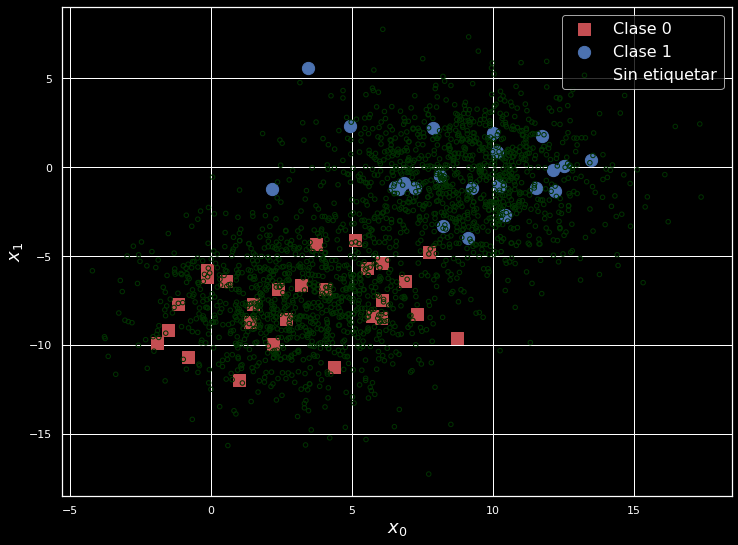

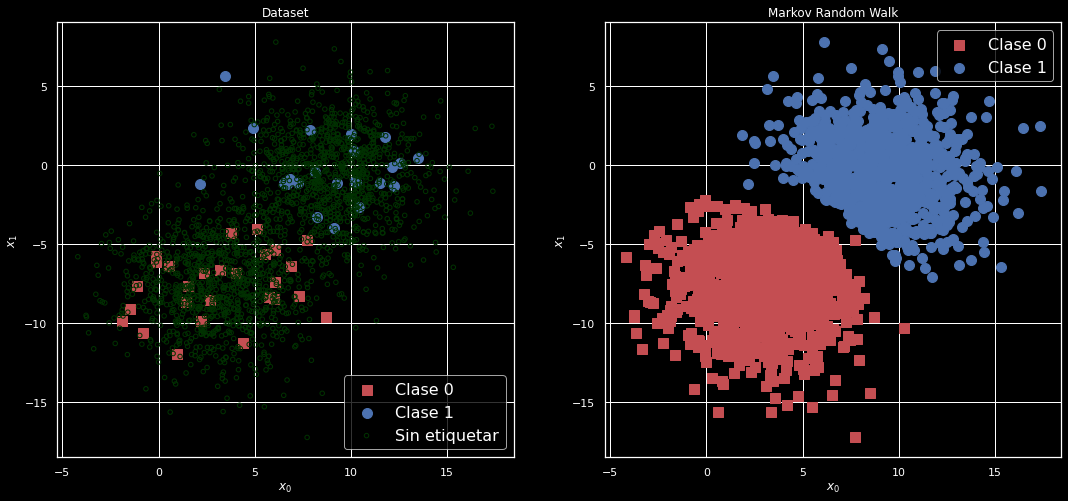

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
plt.style.use('dark_background')


'''
Para este ejemplo en Python de propagación de etiquetas basado en paseos 
aleatorios de Markov, vamos a utilizar un conjunto de datos bidimensional que 
contiene 50 puntos etiquetados pertenecientes a dos clases diferentes, y 1.950 
sin etiquetar:
'''
# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)

nb_samples = 2000
nb_unlabeled = 1950
nb_classes = 2

if __name__ == '__main__':
  X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=nb_classes,
                    cluster_std=2.5, random_state=1000)

  Y[Y == 0] = -1
  Y[nb_samples - nb_unlabeled:nb_samples] = 0

  # Mostrar el conjunto de datos original
  fig, ax = plt.subplots(figsize=(12, 9))

  ax.scatter(X[Y == -1, 0], X[Y == -1, 1], color='r', marker='s', s=150, 
             label="Clase 0")
  ax.scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', marker='o', s=150, 
             label="Clase 1")
  ax.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', facecolor='none', 
             edgecolor='#003200', s=20, label="Sin etiquetar")

  ax.set_xlabel(r'$x_0$', fontsize=18)
  ax.set_ylabel(r'$x_1$', fontsize=18)
  ax.legend(fontsize=16)
  ax.grid(True)

  plt.show()

  '''
  Ahora podemos crear el gráfico (utilizando n_vecinos=15) y la matriz de pesos:
  '''
  # Computar W
  W = kneighbors_graph(X, n_neighbors=15, mode='connectivity', 
                       include_self=True).toarray()

  '''
  Ahora, necesitamos calcular la parte no etiquetada del laplaciano del grafo 
  no normalizado y la parte no etiquetada de la matriz W:
  '''                       
  D = np.diag(np.sum(W, axis=1))
  L = D - W
  Luu = L[nb_samples - nb_unlabeled:, nb_samples - nb_unlabeled:]
  Wul = W[nb_samples - nb_unlabeled:, 0:nb_samples - nb_unlabeled, ]
  Yl = Y[0:nb_samples - nb_unlabeled]
  
  '''
  En este punto, es posible resolver el sistema lineal utilizando la función 
  NumPy np.linalg.solve(), que acepta como parámetros la matriz A y el vector 
  𝑏̅ de un sistema genérico de la forma 𝐴𝑥 = 𝑏𝑏̅ . Cuando la matriz A es muy 
  grande, el sistema podría estar mal condicionado. Se sugiere comprobar el 
  número de condición 𝜌𝜌 antes de resolver el sistema. Si es grande (por 
  ejemplo, 𝜌 ≫ 1) , es preferible utilizar uno de los otros métodos 
  anteriormente comentados. Una vez que tenemos la solución, podemos fusionar 
  las nuevas etiquetas con las originales (donde las muestras no etiquetadas 
  se han marcado con -1). En este caso, no necesitamos convertir las 
  probabilidades, porque estamos usando 0 y 1 como etiquetas. En general, es 
  necesario utilizar un umbral (0,5) para seleccionar la etiqueta correcta:
  '''
  Yu = np.round(np.linalg.solve(Luu, np.dot(Wul, Yl)))
  Y_final = Y.copy()
  Y_final[nb_samples - nb_unlabeled:] = Yu.copy()

  # Mostrar el resultado final
  fig, ax = plt.subplots(1, 2, figsize=(18, 8))

  ax[0].scatter(X[Y == -1, 0], X[Y == -1, 1], color='r', marker='s', s=100, 
                label="Clase 0")
  ax[0].scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', marker='o', s=100, 
                label="Clase 1")
  ax[0].scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', facecolor='none', 
                edgecolor='#003200', s=20, label="Sin etiquetar")

  ax[0].set_xlabel(r'$x_0$')
  ax[0].set_ylabel(r'$x_1$')
  ax[0].set_title('Dataset')
  ax[0].legend(fontsize=16)
  ax[0].grid(True)

  ax[1].scatter(X[Y_final == -1, 0], X[Y_final == -1, 1], color='r', marker='s', 
                s=100, label="Clase 0")
  ax[1].scatter(X[Y_final == 1, 0], X[Y_final == 1, 1], color='b', marker='o', 
                s=100, label="Clase 1")

  ax[1].set_xlabel(r'$x_0$')
  ax[1].set_ylabel(r'$x_1$')
  ax[1].set_title('Markov Random Walk')
  ax[1].legend(fontsize=16)
  ax[1].grid(True)

  plt.show()

## Clustering y Modelos no supervisados

Vamos a presentar algunos algoritmos fundamentales de clustering y discutiremos sus puntos fuertes y débiles. El campo del aprendizaje no supervisado, así como como cualquier otro enfoque de aprendizaje automático, debe basarse siempre en el concepto de la navaja de Occam. Siempre se debe preferir la simplicidad, siempre que el rendimiento del el modelo cumpla con sus requisitos.  Sin embargo, en este caso, la verdad básica puede ser desconocida. Cuando un algoritmo de clustering Cuando se adopta un algoritmo de agrupación como herramienta de exploración, sólo podemos suponer que el conjunto de datos representa un proceso preciso de generación de datos. Si esta suposición es correcta, la mejor estrategia es determinar el número de conglomerados para maximizar la cohesión interna (densidad) y la separación externa. Esto significa que esperamos encontrar manchas (o islotes) cuyas muestras comparten algunas características comunes y parcialmente únicas.

### Vecinos más cercanos K

Este algoritmo pertenece a una familia particular denominada algoritmos basados en instancias (la metodología se llama aprendizaje basado en instancias).

Se diferencia de otros enfoques porque no trabaja con un modelo matemático real. Por el contrario, la inferencia se realiza mediante la comparación directa de las nuevas muestras con las existentes (que se definen como instancias). KNN es un enfoque que puede emplearse fácilmente para resolver problemas de agrupación, clasificación y regresión (aunque, en este caso, vamos a considerar sólo la primera técnica). La idea principal del algoritmo de clustering es muy sencilla. Consideremos un proceso de generación de datos $p_{data}$ y finito un conjunto de datos extraídos de esta distribución:

$$X={\overline x_1, \overline x_2, ..., \overline x_n} \text{ donde } \overline x_1 \in \mathbb{R}^N$$

Cada punto tiene una dimensionalidad igual a N. Ahora podemos introducir una función de distancia $𝑑(\overline x_1, \overline x_2)$, que en la mayoría de los casos puede generalizarse con la distancia de Minkowski:

$$d_p(\overline x_1, \overline x_2)=(\sum^{N}_{j=1} |x^{-j}_1 - x^{-j}_2|^p)^{\frac {1}{p}}$$

Cuando p = 2, 𝑑𝑝 (𝑥̅1, 𝑥̅2) representa la distancia euclidiana clásica, que normalmente es la elección por defecto en casi cualquier escenario. En casos particulares, puede ser útil emplear otras variantes, como p = 1 (que también se conoce como distancia Manhattan) o p > 2. Aunque todas las propiedades de una función métrica permanezcan inalteradas, diferentes valores de p producen resultados que pueden ser semánticamente diversos.


### K-means

Cuando hablamos del algoritmo de la mezcla gaussiana, lo definimos como K-means suave. La razón es que cada cluster estaba representado por tres elementos: media, varianza y peso. Cada muestra pertenece siempre a todos los clusters con una probabilidad proporcionada por las distribuciones gaussianas. Este enfoque puede ser muy útil cuando es posible manejar las probabilidades como pesos, pero en muchas otras situaciones es preferible determinar un solo cluster por muestra.

Este enfoque se denomina clustering duro y los K-means pueden considerarse la versión dura de una mezcla gaussiana. De hecho, cuando todas las varianzas Σ𝑖 → 0 , las distribuciones degeneran en deltas de Dirac $𝛿(𝑥 - 𝑥_0)$, que representan picos perfectos centrados en un punto específico (aunque no sean funciones reales sino distribuciones). En este escenario, la única posibilidad de determinar el clúster más adecuado es encontrar la distancia más corta entre un punto de la muestra y todos los centros (a partir de ahora, vamos a llamarlos centroides). Este enfoque se basa también en un doble principio importante que debe tenerse en cuenta en todo algoritmo de clustering. Los clusters deben establecerse para maximizar
- La cohesión intraclúster
- La separación entre clusters

### Métricas de evaluación

En muchos casos, es imposible evaluar el rendimiento de un algoritmo de clustering utilizando sólo una inspección visual. Además, es importante utilizar métricas objetivas estándar que nos permitan comparar diferentes enfoques. 

A continuación vamos a presentar algunos métodos basados en el conocimiento de la verdad de base (la asignación correcta para cada punto de datos) y una estrategia común empleada cuando se desconocen las verdaderas etiquetas.

Antes de hablar de las funciones de puntuación, debemos introducir una notación estándar. Si hay k clusters, definimos las etiquetas verdaderas como:

$$Y_{true}=\{y^{true}_1,y^{true}_2,...,y^{true}_M\} \text{ donde } y^{true}_i \in \{1, 2, ..., k\}$$

Del mismo modo, podemos definir las etiquetas previstas:

$$Y_{pred}=\{y^{pred}_1,y^{pred}_2,...,y^{pred}_M\} \text{ donde } y^{pred}_i \in \{1, 2, ..., k\}$$

Ambos conjuntos pueden considerarse como muestras de dos variables aleatorias discretas (para simplificar, las denotamos con los mismos nombres, cuyas funciones de masa de probabilidad son $𝑃_{true}$(𝑦) y $𝑃_{pred}$(𝑦) con un 𝑦 genérico ∈ {𝑦_1, 𝑦_2, ... , 𝑦_𝑘}  (yi representa el índice del ith cluster). Estas dos probabilidades pueden aproximarse con un recuento de frecuencias; así, por ejemplo, la probabilidad $𝑃_{true}$ (1) se calcula como el número de puntos de datos cuya etiqueta verdadera es una $n_{true}$(1) sobre el número total de puntos de datos M.

### Ejemplo: K-Means

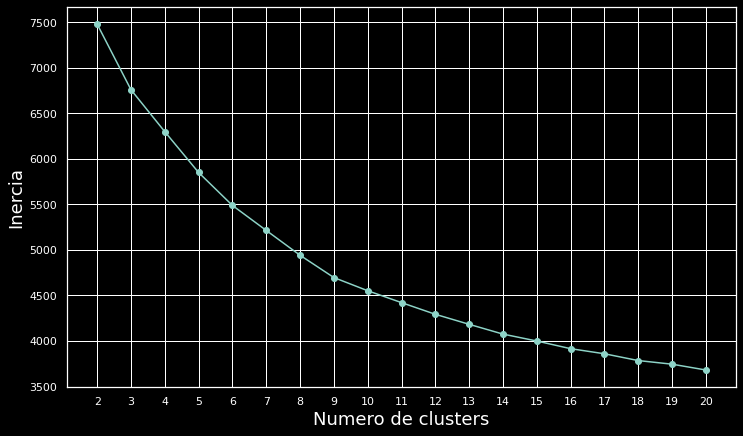

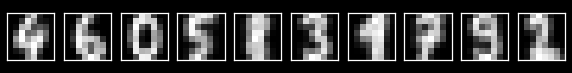

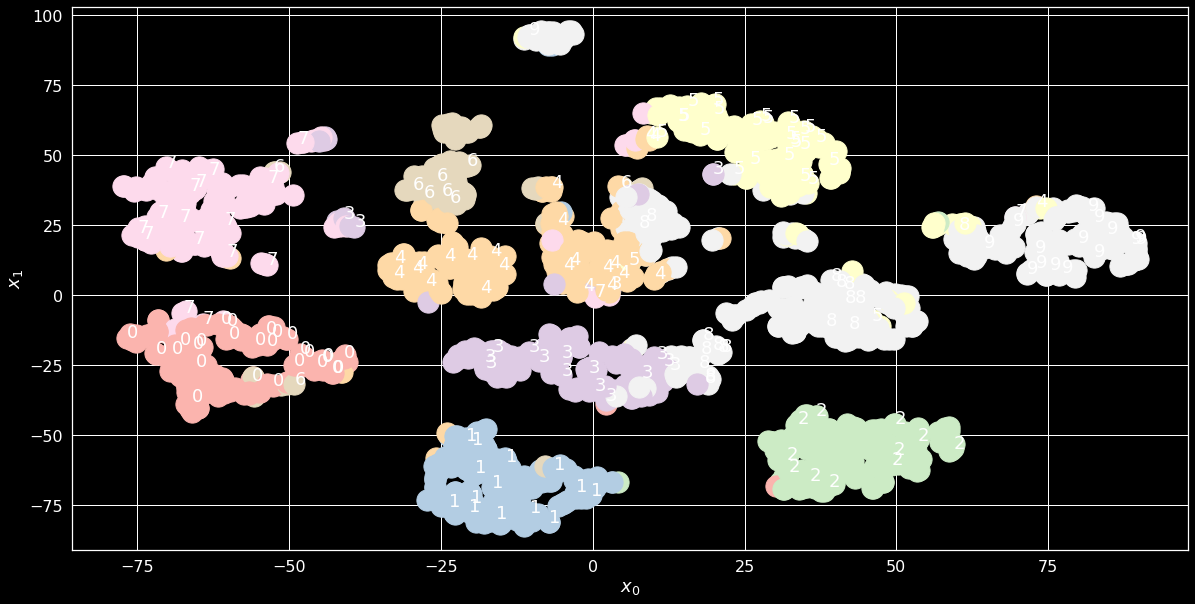

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
plt.style.use('dark_background')

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)


min_nb_clusters = 2
max_nb_clusters = 20


if __name__ == '__main__':
  # Cargar el conjunto de datos
  digits = load_digits()
  X_train = digits['data'] / np.max(digits['data'])

  # Calcular las inercias
  inertias = np.zeros(shape=(max_nb_clusters - min_nb_clusters + 1,))

  for i in range(min_nb_clusters, max_nb_clusters + 1):
    km = KMeans(n_clusters=i, random_state=1000)
    km.fit(X_train)
    inertias[i - min_nb_clusters] = km.inertia_

  # Trazar las inercias
  # sns.set()

  fig, ax = plt.subplots(figsize=(12, 7))

  ax.plot(np.arange(2, max_nb_clusters + 1), inertias, "o-")
  ax.set_xlabel("Numero de clusters", fontsize=18)
  ax.set_ylabel("Inercia", fontsize=18)
  ax.set_xticks(np.arange(2, max_nb_clusters + 1))
  ax.grid(True)
  plt.show()

  # Realizar K-Means con 10 clusters
  km = KMeans(n_clusters=10, random_state=1000)
  Y = km.fit_predict(X_train)

  # Mostrar los centroides
  fig, ax = plt.subplots(1, 10, figsize=(10, 10))

  for i in range(10):
    c = km.cluster_centers_[i]
    ax[i].matshow(c.reshape(8, 8) * 255.0, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

  plt.show()

  # Realice el t-SNE en el conjunto de datos agrupados
  tsne = TSNE(n_components=2, perplexity=10.0, random_state=1000)
  X_tsne = tsne.fit_transform(X_train)
  fig, ax = plt.subplots(figsize=(20, 10))

  # Mostrar el conjunto de datos agrupados t-SNE
  for i in range(X_tsne.shape[0]):
    ax.scatter(X_tsne[i, 0], X_tsne[i, 1], marker='o', color=cm.Pastel1(Y[i]), 
               s=450)
    if i % 10 == 0:
      ax.annotate('%d' % Y[i], xy=(X_tsne[i, 0], X_tsne[i, 1]), fontsize=18)

  ax.set_xlabel(r'$x_0$', fontsize=18)
  ax.set_ylabel(r'$x_1$', fontsize=18)

  for t in ax.xaxis.get_major_ticks():
    t.label.set_fontsize(16)

  for t in ax.yaxis.get_major_ticks():
    t.label.set_fontsize(16)

  ax.grid(True)

  plt.show()

## Clustering avanzado y modelos no supervisados

Seguiremos analizando los algoritmos de clustering, centrando nuestra atención en modelos más complejos que pueden resolver problemas en los que K-means falla. Estos algoritmos son extremadamente útiles en contextos específicos (por ejemplo, la segmentación geográfica) en los que la estructura de los datos es muy poco lineal y cualquier aproximación conduce a una caída sustancial del rendimiento.

### C-means difuso

Ya hemos hablado de la diferencia entre clustering duro y blando, comparando K-means con las mezclas gaussianas. Otra forma de abordar este problema se basa en el concepto de lógica difusa, que fue propuesto por primera vez por Lotfi Zadeh en 1965. Los conjuntos lógicos clásicos se basan en la ley del medio excluido, que en un escenario de clustering puede expresarse diciendo que un punto $\overline x_𝑖$ sólo puede pertenecer a un único cluster $c_j$. 

Hablando en términos más generales, si dividimos nuestro universo en particiones etiquetadas, un enfoque de clustering duro asignaría una etiqueta a cada muestra, mientras que un enfoque difuso (o suave) permitiría la gestión de un grado de pertenencia (en las mezclas gaussianas, se trata de una probabilidad real) $w_{ij}$, que expresa lo fuerte que es la relación entre el punto $\overline x_𝑖$ y el cluster $c_j$.

A diferencia de otros métodos, al emplear la lógica difusa es posible definir conjuntos asimétricos que no son representables con funciones continuas (como como los trapecios). Esto permite una mayor flexibilidad y una mayor capacidad de adaptación a geometrías más complejas.

### Agrupación espectral

Uno de los problemas más comunes de K-means y otros algoritmos similares es la suposición de que sólo tenemos clusters hiperesféricos. De hecho, K-means es insensible al ángulo y asigna una etiqueta sólo en función de la distancia más cercana entre un punto y los centroides. La geometría resultante se basa en hiperesferas donde todos los puntos comparten la misma condición de estar más cerca del mismo centroide. Esta condición puede ser aceptable cuando el conjunto de datos se divide en manchas que pueden ser fácilmente en una estructura geométrica regular. Sin embargo, falla cuando los conjuntos no son separables mediante formas regulares. 

### DBSCAN

La mayoría de los métodos de clustering discutidos hasta ahora se basan en suposiciones sobre la estructura geométrica del conjunto de datos. Por ejemplo, K-means puede encontrar los centroides de regiones hiperesféricas, mientras que el clustering espectral tiene menos limitaciones (en particular  utilizando una matriz de afinidad KNN), pero requiere conocer el número deseado  de clusters y dicha elección condiciona el resultado. Por otro lado, el clustering espectral espectral, así como el DBSCAN (que significa Density-Based Spatial Clustering de Aplicaciones con Ruido), pueden trabajar con clusters no convexos, mientras que K-means requiere tal condición.

DBSCAN es un algoritmo propuesto por Ester para superar todas estas limitaciones. 

### Ejemplo: DBSCAN

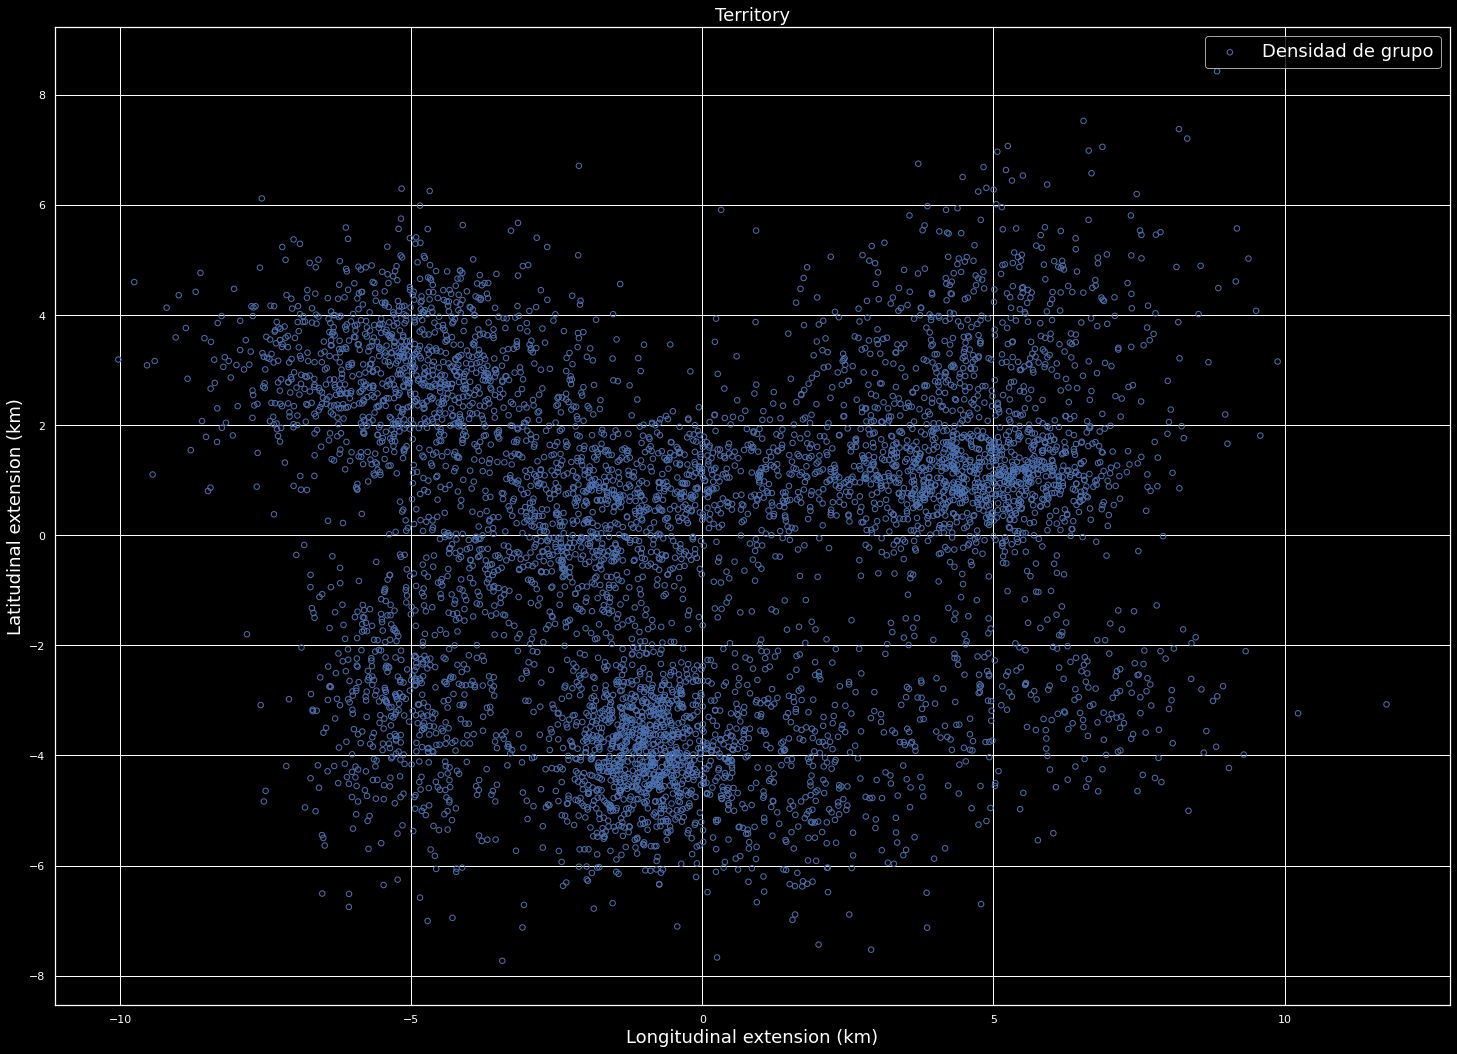

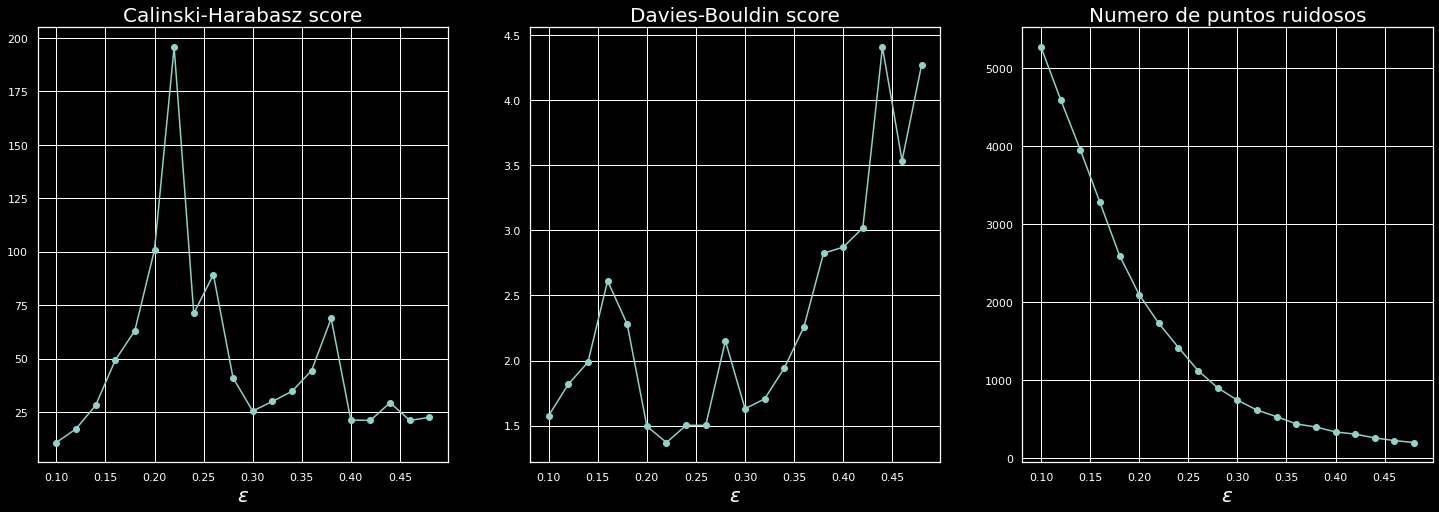

No. clusters: (54,)
No. puntos ruidosos: 2098
CH = 100.91669074221588
DB = 1.494946886124201


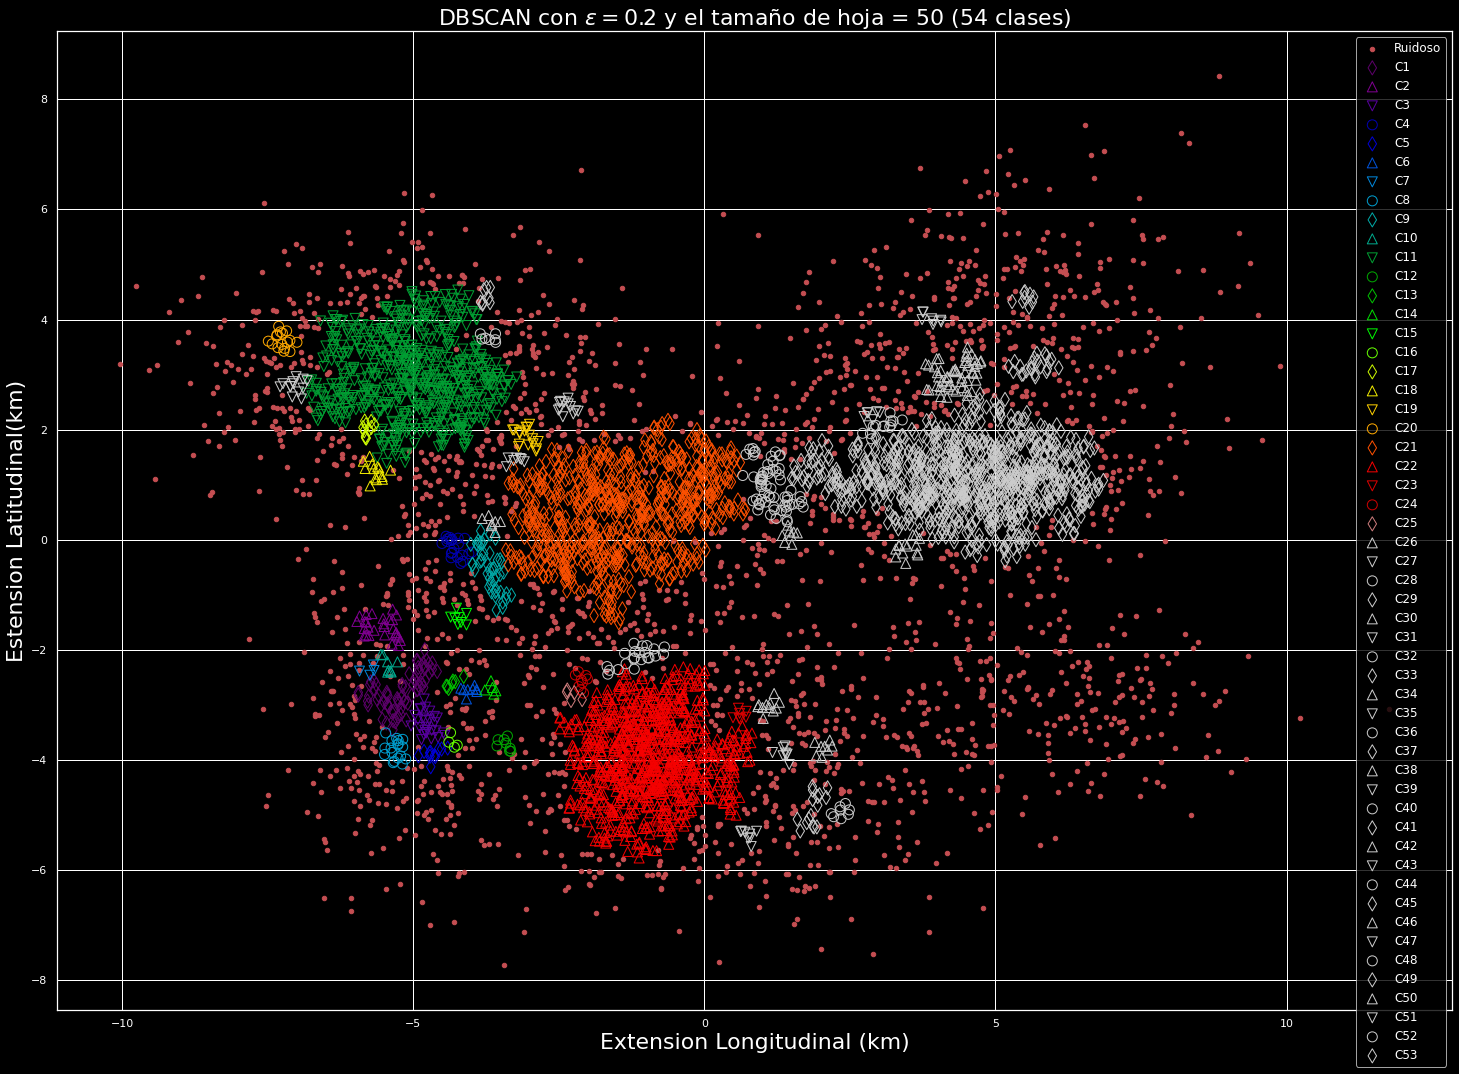

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
plt.style.use('dark_background')


# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)


if __name__ == "__main__":
  # Crear el conjunto de datos
  mus = [[-5, -3], [-5, 3], [-1, -4], [1, -4], [-2, 0],
         [0, 1], [4, 2], [6, 4], [5, 1], [6, -3], [-5, 3]]
  Xts = []

  for mu in mus:
    n = np.random.randint(100, 1000)
    covm = np.diag(np.random.uniform(0.2, 3.5, size=(2,)))
    Xt = np.random.multivariate_normal(mu, covm,
                                       size=(n,))
    Xts.append(Xt)

  X = np.concatenate(Xts)

  # Mostrar el conjunto de datos original
  # sns.set()

  fig, ax = plt.subplots(figsize=(25, 18))

  ax.scatter(X[:, 0], X[:, 1], facecolor='none', edgecolor='b', marker='o', s=30, label="Densidad de grupo")
  ax.set_xlabel("Longitudinal extension (km)", fontsize=18)
  ax.set_ylabel("Latitudinal extension (km)", fontsize=18)
  ax.set_title("Territory", fontsize=18)
  ax.legend(fontsize=18)
  ax.grid(True)

  plt.show()

  # Computar los scores
  ch = []
  db = []
  no = []

  for e in np.arange(0.1, 0.5, 0.02):
    dbscan = DBSCAN(eps=e, min_samples=8, leaf_size=50)
    Y = dbscan.fit_predict(X)
    ch.append(calinski_harabasz_score(X, Y))
    db.append(davies_bouldin_score(X, Y))
    no.append(np.sum(Y == -1))

  # Plotear los resultados
  fig, ax = plt.subplots(1, 3, figsize=(25, 8))

  x = np.arange(0.1, 0.5, 0.02)

  ax[0].plot(x, ch, "o-")
  ax[0].set_xlabel(r"$\epsilon$", fontsize=20)
  ax[0].set_title("Calinski-Harabasz score", fontsize=20)

  ax[1].plot(x, db, "o-")
  ax[1].set_xlabel(r"$\epsilon$", fontsize=20)
  ax[1].set_title("Davies-Bouldin score", fontsize=20)

  ax[2].plot(x, no, "o-")
  ax[2].set_xlabel(r"$\epsilon$", fontsize=20)
  ax[2].set_title("Numero de puntos ruidosos", fontsize=20)

  plt.show()

  # Realizar el clustering
  dbscan = DBSCAN(eps=0.2, min_samples=8, leaf_size=50)
  Y = dbscan.fit_predict(X)

  print("No. clusters: {}".format(np.unique(dbscan.labels_).shape))
  print("No. puntos ruidosos: {}".format(np.sum(Y == -1)))
  print("CH = {}".format(calinski_harabasz_score(X, Y)))
  print("DB = {}".format(davies_bouldin_score(X, Y)))

  # Mostrar el resultado final
  fig, ax = plt.subplots(figsize=(25, 18))

  ms = ['o', 'd', '^', 'v']

  for i, y in enumerate(np.unique(dbscan.labels_)):
    label = "C{}".format(y + 1) if y != -1 else "Ruidoso"
    m = ms[i % 4]
    if y != -1:
      ax.scatter(X[Y == y, 0], X[Y == y, 1], marker=m, facecolor='none', edgecolor=cm.nipy_spectral((y + 1) * 10),
                   s=100, label=label)
    else:
      ax.scatter(X[Y == y, 0], X[Y == y, 1], marker='o', color="r", s=20, label=label)

  ax.set_xlabel("Extension Longitudinal (km)", fontsize=22)
  ax.set_ylabel("Estension Latitudinal(km)", fontsize=22)
  ax.set_title(r"DBSCAN con $\epsilon=0.2$ y el tamaño de hoja = 50 ({} clases)".format(len(np.unique(dbscan.labels_))),
               fontsize=22)
  ax.legend(fontsize=12)
  ax.grid(True)

  plt.show()

## Introducción al análisis de series temporales

Una serie temporal es simplemente una secuencia de valores producidos por un sistema estocástico a lo largo del tiempo. A diferencia de la regresión, que suele opera con sistemas sin estado, las series temporales se basan en una evolución en la memoria del proceso subyacente. Por ejemplo, el nivel de agua en un depósito puede modelarse mediante una serie temporal porque los cambios pueden describirse completamente sólo conocer las condiciones iniciales (por ejemplo, si el tanque está medio lleno, podría haber haber estado vacío y luego medio lleno, o lleno y luego medio vacío).

### Series temporales

El concepto principal se refiere a la estructura de una serie temporal. Suponemos que trabajamos con series univariantes de la forma:

$$y_1, y_2, ..., y_t, ...$$

Cada valor yi depende implícitamente del tiempo (es decir, yi = y(i)); por tanto, la serie no se puede barajar sin perder información. Si los valores $y_t$ están completamente determinados por una ley (como $y_t$ = $t^2$), el proceso subyacente se describe como determinista. Este es el caso de muchas leyes físicas, pero es casi inútil para nosotros porque el futuro no se puede predecir sin incertidumbre. Por otro lado, si cada yi es una variable aleatoria, el proceso es estocástico, y necesitamos encontrar buenas aproximaciones para pronosticar valores no contenidos en el conjunto de entrenamiento.
Los elementos fundamentales de los procesos estocásticos que vamos a emplear son:

- El proceso se denota genéricamente con $y_t$ o y(t).
- Al fijar un valor t se transforma el proceso en una variable aleatoria que, por simplicidad, vamos a definir como $𝑦_𝑡$ ∼ 𝐷 . Se supone que la distribución D que es la misma para todas las realizaciones yt .
- La media temporal del proceso es $𝜇_𝑡$ = 𝐸[𝑦(𝑡)] . De forma análoga, la varianza temporal es $𝜎^2_𝑡$ = 𝐸[(𝑦(𝑡) - $𝐸[𝑦(𝑡)])^2$] .
- La función de autocovarianza se define como: $𝑐_𝑦 (𝑡_1, 𝑡_2)$ = 𝐸[(𝑦($𝑡_1$) - 𝐸[𝑦($𝑡_1$)])(𝑦($𝑡_2$) - 𝐸[𝑦($𝑡_2$))].
- El proceso es fuertemente estacionario si la distribución de probabilidad conjunta completa es invariante a los desplazamientos temporales. Esta condición puede ser extremadamente difícil de cumplir y comprobar; por lo tanto, a menudo nos referimos a procesos débilmente estacionarios, caracterizados por una media y varianza temporal constante y $𝑐_𝑦(𝑡_1, 𝑡_2) = 𝑐_𝑦(𝑡_2 - 𝑡_1) = 𝑐_𝑦(𝜏)$. La estacionariedad fuerte implica la estacionariedad débil, pero lo contrario es cierto sólo para los procesos gaussianos, ya que están totalmente definidos por los dos primeros momentos.
- Si la media vertical (la media obtenida después de haber fijado un instante temporal) es igual a la media temporal, se dice que el proceso es ergódico.
- Un proceso de ruido blanco es un proceso gaussiano (aunque no sea un requisito fundamental requisito), con media nula, varianza fija y realizaciones no correlacionadas (es decir, $𝐶ov[𝑦_𝑡, 𝑦_𝑞] = 0 ∀ 𝑡, 𝑞$).

### Ejemplo: Smoothing

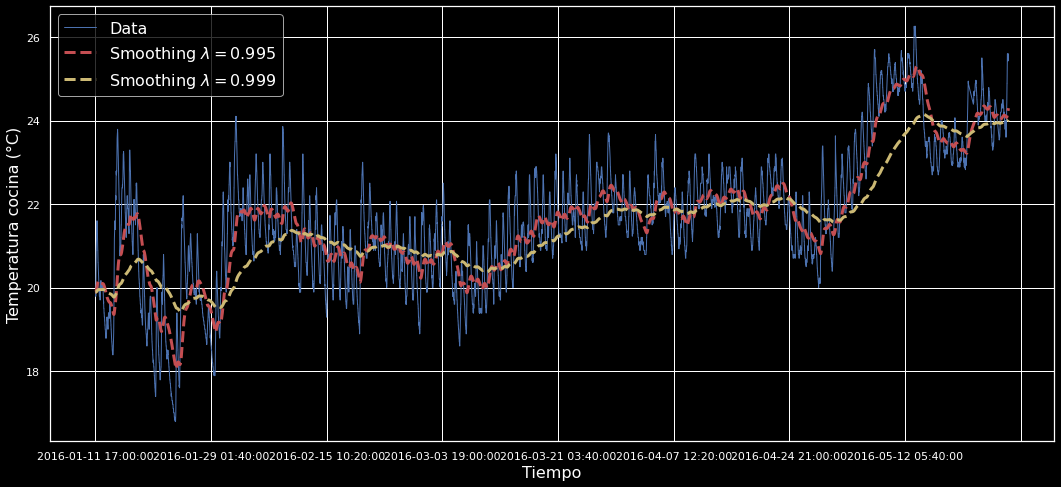

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')

# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)
data_file = 'https://raw.githubusercontent.com/PacktPublishing/Mastering-Machine-Learning-Algorithms-Second-Edition/master/Chapter05/energydata_complete.csv'


if __name__ == "__main__":
  # Leer el conjunto de datos
  df = pd.read_csv(data_file, header=0, index_col="date")

  # Realizar el smoothing
  Y = df["T1"].values
  l1 = 0.995
  l2 = 0.999

  skt = np.zeros((Y.shape[0], 2))
  skt[0, 0] = Y[0]
  skt[0, 1] = Y[0]

  for i in range(1, skt.shape[0]):
    skt[i, 0] = ((1 - l1) * Y[i]) + (l1 * skt[i - 1, 0])
    skt[i, 1] = ((1 - l2) * Y[i]) + (l2 * skt[i - 1, 1])

  # Mostrar los resultados
  # sns.set()

  fig, ax = plt.subplots(figsize=(18, 8))

  df["T1"].plot(label="Data", linewidth=1., color='b')
  ax.plot(skt[:, 0], linewidth=3.0, linestyle="dashed", color="r", 
          label=r"Smoothing $\lambda=0.995$")
  ax.plot(skt[:, 1], linewidth=3.0, linestyle="dashed", color="y", 
          label="Smoothing $\lambda=0.999$")

  ax.set_xlabel("Tiempo", fontsize=16)
  ax.set_ylabel("Temperatura cocina (°C)", fontsize=16)
  ax.legend(fontsize=16)

  plt.show()

## Autocodificadores

Los autocodificadores ofrecen un enfoque diferente a problemas clásicos como la reducción de la dimensionalidad o el aprendizaje de diccionarios; sin embargo, a diferencia de muchos otros algoritmos, no sufren las limitaciones de capacidad que afectan a muchos modelos famosos. Además, pueden explotar capas neuronales específicas (como las convoluciones) para extraer piezas de información basadas en criterios especializados. De este modo, las representaciones internas pueden ser más robustas a diferentes tipos de distorsión, y mucho más eficientes en cuanto a la cantidad de información que pueden procesar.

### Autoencoders

Como la complejidad de un modelo es proporcional a la dimensionalidad de los datos de entrada se han analizado y optimizado muchas técnicas para reducir el número real de número de componentes válidos. Por ejemplo, el PCA selecciona las características en función de su varianza relativa explicada, mientras que el ICA y las técnicas genéricas de aprendizaje de diccionarios buscan átomos básicos que puedan combinarse para reconstruir las muestras originales. A continuación, vamos a analizar una familia de modelos basados en un enfoque ligeramente pero cuyas capacidades se incrementan drásticamente por el empleo de métodos de de métodos de aprendizaje profundo. Un autoencoder genérico es un modelo que se divide en dos componentes separados (pero no completamente autónomos) llamados un codificador y un decodificador. La tarea del codificador es transformar una muestra de entrada en un vector de características vector de características codificado, mientras que la tarea del decodificador es la contraria: reconstruir la muestra original original utilizando el vector de características como entrada.

### Autocodificadores de eliminación de ruido

Los autocodificadores pueden utilizarse para determinar las representaciones incompletas de un conjunto de datos. Sin embargo, Bengio et al. (en Vincent P., Larochelle H., Lajoie I., Bengio Y., Manzagol P., Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion, del Journal of Machine Learning Research, 11/2010) propusieron utilizar autocodificadores para denotar las muestras de entrada en lugar de aprender la representación exacta de una muestra para reconstruirla a partir de un código de baja dimensión.  Esta idea no es nueva, ya que, por ejemplo, las redes de Hopfield (propuestas hace unas décadas) tenían el mismo propósito, pero sus limitaciones en términos de capacidad llevaron a los investigadores a buscar métodos diferentes. Hoy en día, los autocodificadores profundos pueden manejar fácilmente datos de alta dimensión (como las imágenes) con el consiguiente requerimiento de espacio. Por eso, muchos se están replanteando la idea de enseñar a una red a reconstruir una imagen de muestra partiendo de una corrupta. Formalmente, no hay muchas diferencias entre los autocodificadores de denoising y los autocodificadores estándar. Sin embargo, en este caso, el codificador debe trabajar con muestras ruidosas:

$$\overline z_i=e(\overline x_i + \overline n_i) \text{ donde } \overline x_i \in X$$

La función de coste del descodificador sigue siendo la misma. Si el ruido se muestrea en cada lote, la repetición del proceso durante un número suficientemente grande de iteraciones permite al autocodificador aprender a reconstruir la imagen original cuando faltan algunos fragmentos o están corruptos. Para lograr este objetivo, los autores sugieren diferentes tipos de ruido posibles. La opción más común es muestrear el ruido gaussiano, que tiene algunas características útiles y es coherente con muchos procesos ruidosos del mundo real:

$$\overline z_i = e(\overline x_i + \overline n_i(t);\overline \theta_e) \text{ donde } \overline x_i \in X y \overline n_i(t)∼N(0, \Sigma)$$

### Autocodificadores dispersos

En general, los autocodificadores estándar producen representaciones internas densas. Esto significa que la mayoría de los valores son diferentes de cero. En algunos casos, sin embargo, es más útil tener un código disperso que pueda representar mejor los átomos que pertenecen a un diccionario. En este caso, si $\overline z_i=(0,0,...,\overline z^{(n)}_i, 0,0,...,\overline z^{(n)}_i, ..., 0,0)$, podemos considerar ̅cada muestra como la superposición de átomos específicos ponderados en consecuencia. Para lograr este objetivo, podemos simplemente aplicar una penalización $L_1$ a la capa de código. La función de pérdida para una sola muestra, por lo tanto, se convierte en lo siguiente:

$$\hat L(\overline x_i; \overline \theta_e, \overline \theta_d)= L(\overline x_i; \overline \theta_e, \overline \theta_d)+\alpha||\overline z_i||_i$$

En este caso, hay que tener en cuenta el hiperparámetro adicional α, que debe ajustarse para aumentar la dispersión sin un impacto negativo en la precisión. Como regla general, sugiero empezar con un valor igual a 0,01 y luego reducirlo hasta conseguir el resultado deseado. En la mayoría de los casos, los valores más altos producen un rendimiento muy pobre, por lo que generalmente se evitan. 

### Autocodificadores variacionales

Un autoencodificador variacional (VAE) es un modelo generativo propuesto por Kingma y Wellin (en su trabajo Kingma D. P., Wellin M., Auto Encoding Variational Bayes, arXiv:1312.6114 [stat.ML]) que se parece parcialmente a un autoencodificador estándar, pero tiene algunas diferencias internas fundamentales. El objetivo, de hecho, no es encontrar una representación codificada de un conjunto de datos, sino determinar los parámetros de un proceso generativo que sea capaz de producir todas las salidas posibles dado un proceso generador de datos de entrada.

Tomemos el ejemplo de un modelo basado en un vector de parámetros aprendibles 𝜃̅ y un conjunto de variables latentes 𝑧̅ que tienen una función de densidad de probabilidad 𝑝(𝑧̅; 𝜃̅) . Nuestro objetivo puede, por tanto, definirse como la búsqueda de los parámetros de 𝜃̅ que maximizan la probabilidad de la distribución marginada 𝑝(𝑥̅; 𝜃̅) (obtenida a través de la integración de la probabilidad conjunta 𝑝(𝑥̅, 𝑧̅; 𝜃̅)):

$$p(\overline x, \overline \theta)=\int{p(\overline x, \overline z, \overline \theta)d\overline z}=\int{p(\overline x | \overline z, \overline \theta)p(\overline z; \overline \theta)d\overline z}$$

### Ejemplo: Autocodificador variacional

Epoca 1: Perdida: 102546.227
Epoca 2: Perdida: 82758.391
Epoca 3: Perdida: 70677.266
Epoca 4: Perdida: 64029.207
Epoca 5: Perdida: 59810.352
Epoca 6: Perdida: 56944.488
Epoca 7: Perdida: 54189.543
Epoca 8: Perdida: 51522.184
Epoca 9: Perdida: 49801.715
Epoca 10: Perdida: 48660.449
Epoca 11: Perdida: 47749.273
Epoca 12: Perdida: 46960.391
Epoca 13: Perdida: 46433.504
Epoca 14: Perdida: 45953.574
Epoca 15: Perdida: 45490.781
Epoca 16: Perdida: 45141.562
Epoca 17: Perdida: 44824.105
Epoca 18: Perdida: 44715.812
Epoca 19: Perdida: 44335.312
Epoca 20: Perdida: 44120.367
Epoca 21: Perdida: 43837.699
Epoca 22: Perdida: 43627.516
Epoca 23: Perdida: 43443.199
Epoca 24: Perdida: 43444.887
Epoca 25: Perdida: 43227.949
Epoca 26: Perdida: 43072.586
Epoca 27: Perdida: 42990.945
Epoca 28: Perdida: 42843.223
Epoca 29: Perdida: 42646.254
Epoca 30: Perdida: 42536.262
Epoca 31: Perdida: 42402.441
Epoca 32: Perdida: 42333.508
Epoca 33: Perdida: 42250.098
Epoca 34: Perdida: 42117.945
Epoca 35: Perdida: 420

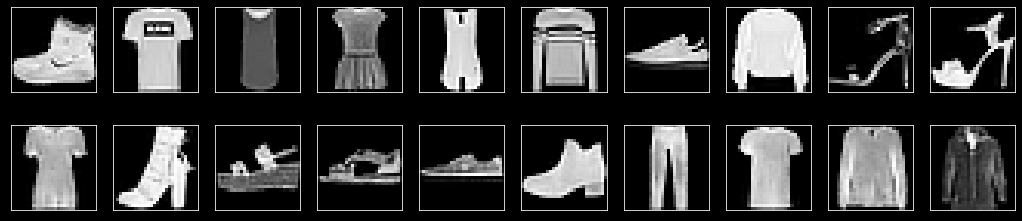

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
plt.style.use('dark_background')


# Establecer una semilla aleatoria para la reproducibilidad
np.random.seed(1000)
tf.random.set_seed(1000)


nb_samples = 1000
nb_epochs = 400
batch_size = 200
code_length = 256


class DAC(tf.keras.Model):
  def __init__(self, width, height):
    super(DAC, self).__init__()

    self.width = width
    self.height = height

    self.c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                        strides=(2, 2), activation=tf.keras.activations.relu,
                        padding='same')

    self.c2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                        activation=tf.keras.activations.relu, padding='same')

    self.c3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                        activation=tf.keras.activations.relu, padding='same')

    self.flatten = tf.keras.layers.Flatten()

    self.code_mean = tf.keras.layers.Dense(units=width * height)

    self.code_log_variance = tf.keras.layers.Dense(units=width * height)

    self.dc0 = tf.keras.layers.Conv2DTranspose(filters=63, kernel_size=(3, 3),
                        strides=(2, 2),activation=tf.keras.activations.relu,
                        padding='same')

    self.dc1 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3),
                        strides=(2, 2),activation=tf.keras.activations.relu,
                        padding='same')

    self.dc2 = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3),
                                               padding='same')

  def r_images(self, x):
    return tf.image.resize(x, (32, 32))

  def encoder(self, x):
    c1 = self.c1(self.r_images(x))
    c2 = self.c2(c1)
    c3 = self.c3(c2)
    code_input = self.flatten(c3)
    mu = self.code_mean(code_input)
    sigma = self.code_log_variance(code_input)
    code_std = tf.sqrt(tf.exp(sigma))
    normal_samples = tf.random.normal(mean=0.0, stddev=1.0, 
                                      shape=(batch_size, width * height))
    z = (normal_samples * code_std) + mu
    return z, mu, code_std

  def decoder(self, z):
    decoder_input = tf.reshape(z, (-1, 7, 7, 16))
    dc0 = self.dc0(decoder_input)
    dc1 = self.dc1(dc0)
    dc2 = self.dc2(dc1)
    return dc2, tf.keras.activations.sigmoid(dc2)

  def call(self, x):
    code, cm, cs = self.encoder(x)
    logits, xhat = self.decoder(code)
    return logits, cm, cs, xhat


# Cargar el conjunto de datos
(X_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0

width = X_train.shape[1]
height = X_train.shape[2]

# crear el modelo
model = DAC(width, height)

# Definir el optimizador y la función de pérdida del entrenamiento
optimizer = tf.keras.optimizers.Adam(0.001)
train_loss = tf.keras.metrics.Mean(name='train_loss')


@tf.function
def train(images):
  with tf.GradientTape() as tape:
    logits, cm, cs, _ = model(images)
    loss_r = \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=images)
    kl_divergence = 0.5 * tf.reduce_sum(tf.math.square(cm) + tf.math.square(cs)\
        - tf.math.log(1e-8 + tf.math.square(cs)) - 1, axis=1)
    loss = tf.reduce_sum(loss_r) + kl_divergence

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)


if __name__ == '__main__':
  X_train_g = tf.data.Dataset.from_tensor_slices(
      np.expand_dims(X_train, axis=3)).shuffle(1000).batch(batch_size)

  # Entrenar el modelo
  for e in range(nb_epochs):
    for xi in X_train_g:
      train(xi)

    # print("Epoca {}: Perdida: {:.3f}".format(e + 1, train_loss.result()))
    train_loss.reset_states()

  # Mostrar algunos ejemplos
  Xs = np.reshape(X_train[0:batch_size],
                  (batch_size, width, height, 1))
  _, _, _, Ys = model(Xs)
  Ys = np.squeeze(Ys * 255.0)

  # Mostrar los resultadosShow the results
  # sns.set()

  fig, ax = plt.subplots(2, 10, figsize=(18, 4))

  for i in range(10):
    ax[0, i].imshow(np.squeeze(Xs[i]), cmap='gray')
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

    ax[1, i].imshow(Ys[i + 10], cmap='gray')
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

  plt.show()